<a href="https://colab.research.google.com/github/MADHAVAHARSHA/GunShot-Classification/blob/main/multifire_arm_audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 * Load the zip files of audio recording from zip files

In [ ]:
#file 1
import gdown
file_id = '1SpiDmHchb48nF1NSbTqk5RifH1BspuVB'
output = 'file_1.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output)

#file 2
import gdown
file_id = '1K7ZpQP698z7GXLKpwmm0sp10DrpQdoKG'
output = 'file_2.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output)

#file 3
import gdown
file_id = '10h7X4pze7J8cI9GD9Msy0WMPvUZVqB79'
output = 'file_3.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output)

#file 4
import gdown
file_id = '1NzAq_KApzjVwmLDz-HTuj-9goH4ofOHQ'
output = 'file_4.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output)

Downloading...
From: https://drive.google.com/uc?id=1SpiDmHchb48nF1NSbTqk5RifH1BspuVB
To: /content/file_1.zip
100%|██████████| 522M/522M [00:06<00:00, 75.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K7ZpQP698z7GXLKpwmm0sp10DrpQdoKG
To: /content/file_2.zip
100%|██████████| 306M/306M [00:02<00:00, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=10h7X4pze7J8cI9GD9Msy0WMPvUZVqB79
To: /content/file_3.zip
100%|██████████| 493M/493M [00:05<00:00, 88.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NzAq_KApzjVwmLDz-HTuj-9goH4ofOHQ
To: /content/file_4.zip
100%|██████████| 370M/370M [00:06<00:00, 56.2MB/s]


'file_4.zip'

* Extract the zip files

In [ ]:
import zipfile

# List of file names to be extracted
file_names = ['file_1.zip', 'file_2.zip', 'file_3.zip', 'file_4.zip']

# Specify the common destination folder for extraction
destination_folder_base = '/content/'

# Loop through each file name
for file_name in file_names:
    # Specify the path to the current zip file
    zip_path = f'/content/{file_name}'

    # Specify the destination folder for the current file
    destination_folder = f'{destination_folder_base}{file_name.replace(".zip", "")}'

    # Open the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract all contents to the destination folder
        zip_ref.extractall(destination_folder)

    print(f"File successfully unzipped: {file_name}")


File successfully unzipped: file_1.zip
File successfully unzipped: file_2.zip
File successfully unzipped: file_3.zip
File successfully unzipped: file_4.zip


* Import packages

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
labels_data = pd.read_csv("/content/gunshot-audio-labels-only.csv")

In [ ]:
labels_data.head()

,filename,num_gunshots,gunshot_location (in seconds),,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,019439aa-e146-49da-b59c-28a594fba7e2_v0,2,0.080998,1.746712,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,019439aa-e146-49da-b59c-28a594fba7e2_v1,1,1.720635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,019439aa-e146-49da-b59c-28a594fba7e2_v2,2,0.006281,1.718390,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,019439aa-e146-49da-b59c-28a594fba7e2_v3,2,0.383537,1.716599,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,019439aa-e146-49da-b59c-28a594fba7e2_v4,2,0.110748,1.720680,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
meta_data = pd.read_csv("/content/gunshot-audio-all-metadata.csv")

In [ ]:
meta_data.head()

,filename,uuid,label,recording_session,timestamp,time_offset_s,device_name,device_manufacturer,device_model,microphone,firearm,caliber,latitude,longitude,gunshot_location_in_seconds,num_gunshots
0,880b3ce5-9c19-4c12-a813-b223bb4f2897_v1,880b3ce5-9c19-4c12-a813-b223bb4f2897,9mm,1,2021-11-15T12:46:11.907-04:00,17.614000,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,[1.72269841],1
1,fed855d4-d9c4-42c5-a5c5-ddc5edd69e14_v0,fed855d4-d9c4-42c5-a5c5-ddc5edd69e14,9mm,1,2021-11-15T12:47:41.122-04:00,17.614000,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,[1.67290249],1
2,369d77b1-3141-40e2-8fb5-77d57d560472_v0,369d77b1-3141-40e2-8fb5-77d57d560472,9mm,1,2021-11-15T12:50:03.647-04:00,17.636999,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,[1.61977324 3.50795918 5.42746032],3
3,cfe036af-d99f-46a5-8829-32a66b45be70_v1,cfe036af-d99f-46a5-8829-32a66b45be70,9mm,1,2021-11-15T12:51:30.693-04:00,17.547001,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,[1.75 1.98768707 2.26022676],3
4,b0f71933-ce93-45ae-bf09-6838af56c0ee_v0,b0f71933-ce93-45ae-bf09-6838af56c0ee,9mm,1,2021-11-15T12:52:47.686-04:00,17.579000,Galaxy S21 5G Lemon Brownie,Samsung,SM-G991U1,Samsung Galaxy S21 Internal Mic,Glock 17,9mm,28.342295,-80.781939,[1.75 2.61845805 3.06664399],3


* Plotting the spectrogram from the audio_files

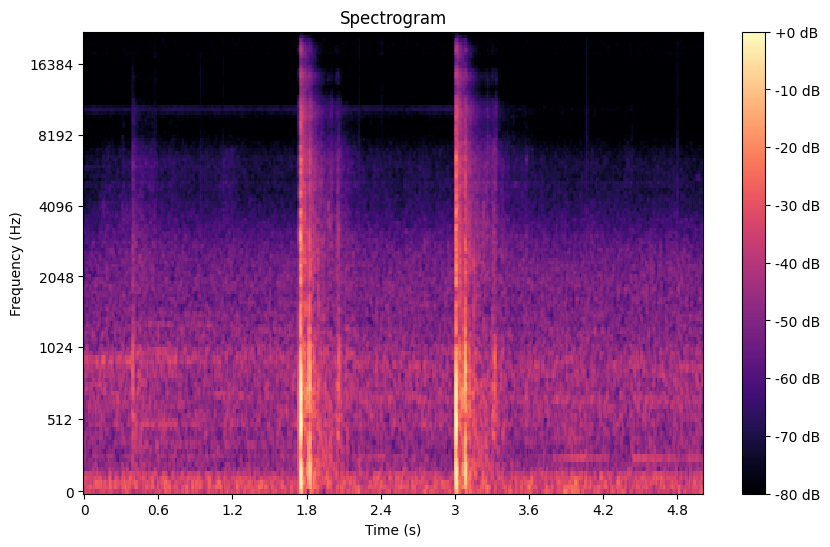

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Assuming audio is the waveform and sr is the sample rate
audio_file_path = "/content/file_1/ruger_ar_556_dot223_caliber/0495b86d-2f39-4912-916b-0cfbc160cf3d_chan0_v0.wav"
audio, sr = librosa.load(audio_file_path, sr=None)

# Compute the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# Convert to decibels
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


* We can clearly see that there is a gunshot on time 1.8 and 3 we can say that 2 gunshots are happening in this images

* image.png

* By our analysis and by seeing the above metadata we can conclude that we have 2 gunshots by visually.


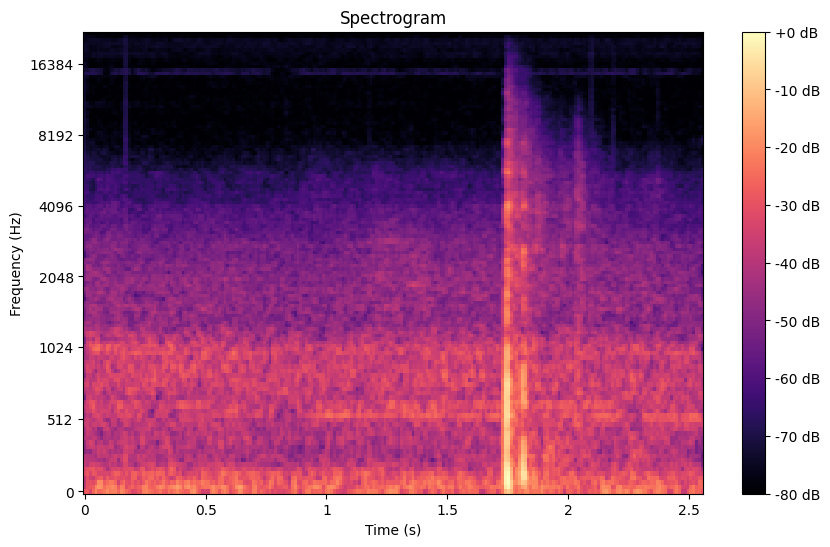

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Assuming audio is the waveform and sr is the sample rate
audio_file_path = "/content/file_2/remington_870_12_gauge/063b74d6-eb05-437e-b767-14a3248cd10c_chan4_v1.wav"
audio, sr = librosa.load(audio_file_path, sr=None)

# Compute the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# Convert to decibels
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


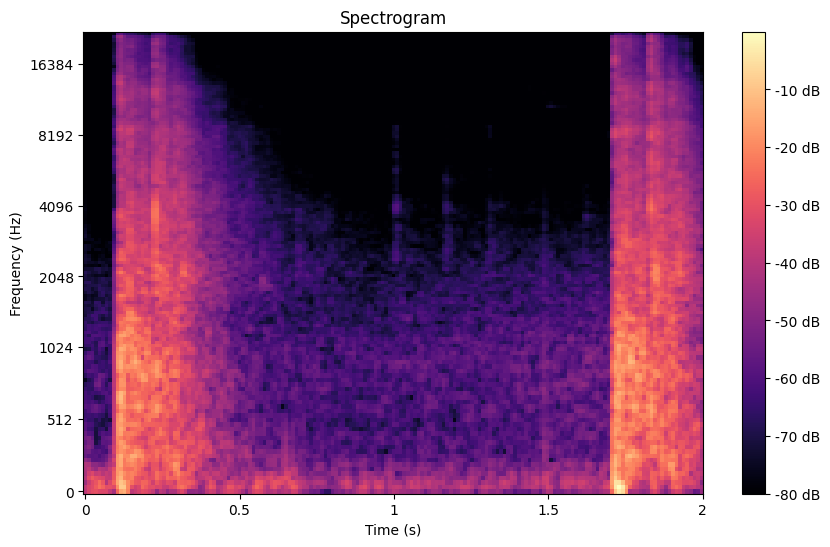

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Assuming audio is the waveform and sr is the sample rate
audio_file_path = "/content/file_3/glock_17_9mm_caliber/019439aa-e146-49da-b59c-28a594fba7e2_v4.wav"
audio, sr = librosa.load(audio_file_path, sr=None)

# Compute the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# Convert to decibels
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


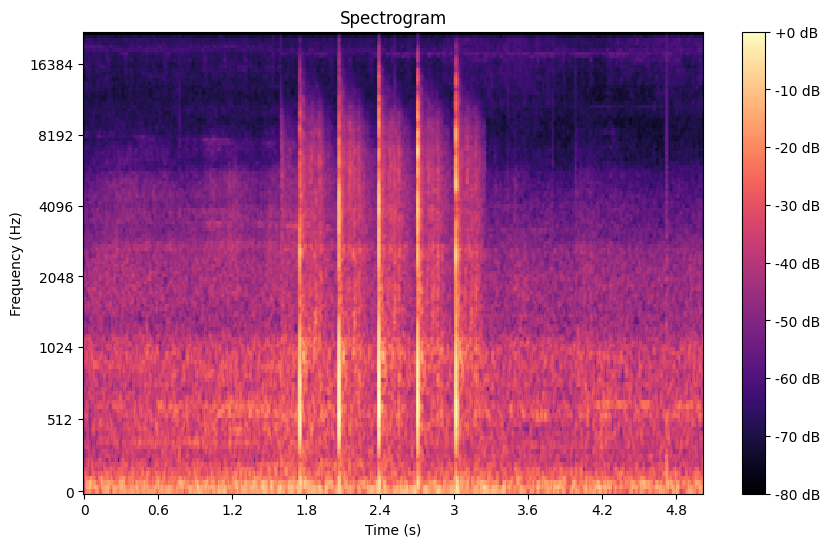

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Assuming audio is the waveform and sr is the sample rate
audio_file_path = "/content/file_4/38s&ws_dot38_caliber/03fc4685-909e-42c5-aff0-f519f1d14b12_chan4_v0.wav"
audio, sr = librosa.load(audio_file_path, sr=None)

# Compute the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# Convert to decibels
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


* Now we can do this in 2 methods
 1. By using LSTM
   - we need to convert the data into MFCSS, Padsequence
 2. By using CNN
  - we need to plot the spectrogram and save the images with labels using meta_data and predict the outome

In [ ]:
import os
import librosa
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Example paths
base_path = '/content/'
audio_extension = '.wav'

# Initialize empty lists to store features and labels
all_mfccs = []
all_labels = []
max_sequence_length = 320

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each top-level folder (file_1, file_2, file_3, file_4)
for folder_name in ['file_1', 'file_2', 'file_3', 'file_4']:
    folder_path = os.path.join(base_path, folder_name)

    # Iterate over each nested folder within the top-level folder
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith(audio_extension):
                # Construct the full path to the audio file
                audio_file_path = os.path.join(root, file_name)

                # Load audio file
                audio, sr = librosa.load(audio_file_path, sr=None)

                # Extract MFCCs
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

                # Pad sequences
                padded_mfccs = pad_sequences(mfccs, maxlen=max_sequence_length, padding='post', truncating='post')

                # Extract label from the metadata
                label = meta_data.loc[meta_data['filename'] == file_name.replace(audio_extension, ''), 'label'].iloc[0]

                # Append features and labels to the lists
                all_mfccs.append(padded_mfccs)
                all_labels.append(label)

# Convert lists to numpy arrays
X = np.array(all_mfccs)
y = label_encoder.fit_transform(all_labels)


In [ ]:
X.shape

(2148, 13, 320)

In [ ]:
unique_labels = np.unique(y)
print("Unique Numerical Labels:", unique_labels)


Unique Numerical Labels: [0 1 2 3]


In [ ]:
X

array([[[-420, -422, -436, ..., -428, -431, -435],
        [ 180,  174,  157, ...,  159,  153,  149],
        [  44,   32,   19, ...,    7,    1,    1],
        ...,
        [  -4,    2,   14, ...,    0,    4,    4],
        [  -8,   -4,    4, ...,    1,    6,    6],
        [   5,   -1,   -2, ...,    0,    3,    6]],

       [[-725, -707, -715, ..., -709, -711, -717],
        [  82,   92,   90, ...,   95,   93,   86],
        [  36,   31,   36, ...,   33,   33,   27],
        ...,
        [  -1,   -3,    1, ...,   10,   11,   13],
        [  -3,   -2,    0, ...,    5,    6,    7],
        [   0,    0,    3, ...,    4,    3,    3]],

       [[-703, -679, -678, ...,    0,    0,    0],
        [ 156,  172,  177, ...,    0,    0,    0],
        [  -8,   -7,   -5, ...,    0,    0,    0],
        ...,
        [   0,    1,    6, ...,    0,    0,    0],
        [   0,    4,    4, ...,    0,    0,    0],
        [  10,   12,   12, ...,    0,    0,    0]],

       ...,

       [[-719, -696, -69

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X contains your padded MFCCs and y contains the encoded labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels
num_classes = len(np.unique(y))
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(13, 320), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Epoch 1/10
43/43 [==============================] - 10s 86ms/step - loss: 1.2719 - accuracy: 0.4076 - val_loss: 1.1496 - val_accuracy: 0.4942
Epoch 2/10
43/43 [==============================] - 3s 63ms/step - loss: 0.9664 - accuracy: 0.6077 - val_loss: 1.0821 - val_accuracy: 0.5436
Epoch 3/10
43/43 [==============================] - 3s 82ms/step - loss: 0.7788 - accuracy: 0.6980 - val_loss: 1.0648 - val_accuracy: 0.5698
Epoch 4/10
43/43 [==============================] - 4s 94ms/step - loss: 0.6298 - accuracy: 0.7511 - val_loss: 0.8488 - val_accuracy: 0.6686
Epoch 5/10
43/43 [==============================] - 3s 65ms/step - loss: 0.5036 - accuracy: 0.8108 - val_loss: 0.7475 - val_accuracy: 0.6919
Epoch 6/10
43/43 [==============================] - 3s 66ms/step - loss: 0.4567 - accuracy: 0.8268 - val_loss: 0.6864 - val_accuracy: 0.7297
Epoch 7/10
43/43 [==============================] - 3s 66ms/step - loss: 0.3658 - accuracy: 0.8639 - val_loss: 0.6483 - val_accuracy: 0.7703
Epoch 8/10
4

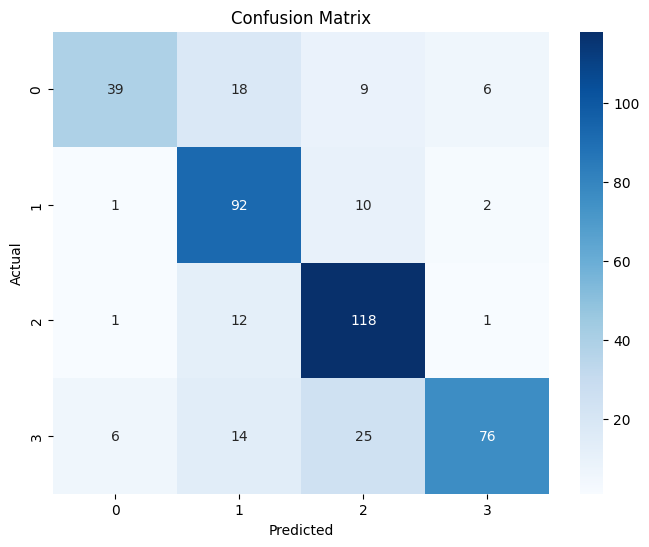

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test_classes and y_pred_classes are defined

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



* By seeing the above results we can conclude that our model is easily predict the outcome of Gunshots and which type of gunshots.

For CNN

In [ ]:
import zipfile

# List of file names to be extracted
file_names = ['file_1.zip', 'file_2.zip', 'file_3.zip', 'file_4.zip']

# Specify the common destination folder for extraction
destination_folder_base = '/content'

# Loop through each file name
for file_name in file_names:
    # Specify the path to the current zip file
    zip_path = f'/content/{file_name}'

    # Specify the destination folder for the current file
    destination_folder = f'{destination_folder_base}/Gunshot_dataset/edge-collected-gunshot-audio/'

    # Open the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract all contents to the destination folder
        zip_ref.extractall(destination_folder)

    print(f"File successfully unzipped: {file_name}")


File successfully unzipped: file_1.zip
File successfully unzipped: file_2.zip
File successfully unzipped: file_3.zip
File successfully unzipped: file_4.zip


In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm


# Function to read sounds and convert to spectrograms
def read_data(folder_path):
    labels = []
    spectrograms = []

    for label in tqdm(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, label)
        if os.path.isdir(subfolder_path):
            for file in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file)
                if file_path.endswith('.wav'):
                   # print(file_path)
                    y, sr = librosa.load(file_path)
                    S = librosa.stft(y)
                    S_mag = np.abs(S)
                    S_dB = librosa.amplitude_to_db(S_mag, ref=np.max)
                    spectrograms.append(S_dB)
                    labels.append(label)

    return spectrograms, labels
# Function to pad or trim a 2D array to a desired shape

# Path to dataset
folder_path = './Gunshot_dataset/edge-collected-gunshot-audio'

# Read spectrograms and labels
spectrograms, labels = read_data(folder_path)


100%|██████████| 4/4 [00:46<00:00, 11.58s/it]


In [ ]:
def pad2d(a, desired_size):
    rows, cols = a.shape
    padded_a = np.zeros((desired_size, desired_size))
    rows_to_copy = min(rows, desired_size)
    cols_to_copy = min(cols, desired_size)
    padded_a[:rows_to_copy, :cols_to_copy] = a[:rows_to_copy, :cols_to_copy]
    return padded_a


# Preprocess data
desired_spectrogram_size = 128
spectrograms = np.array([pad2d(s, desired_spectrogram_size) for s in spectrograms])
spectrograms = np.expand_dims(spectrograms, axis=-1)
print(spectrograms.shape)
label_dict = {label: i for i, label in enumerate(set(labels))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(spectrograms, y, test_size=0.2, random_state=42)

# Define input shape and number of classes
input_shape = X_train[0].shape
num_classes = y.shape[1]

(2148, 128, 128, 1)


In [ ]:
# Create CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create and compile the model
model = create_cnn_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 63, 63, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Save the model
model.save("best_model")

Epoch 1/100
54/54 [==============================] - 68s 1s/step - loss: 2.1398 - accuracy: 0.4447 - val_loss: 2.8314 - val_accuracy: 0.3047
Epoch 2/100
54/54 [==============================] - 59s 1s/step - loss: 0.9463 - accuracy: 0.6205 - val_loss: 1.3449 - val_accuracy: 0.4930
Epoch 3/100
54/54 [==============================] - 57s 1s/step - loss: 0.7265 - accuracy: 0.7142 - val_loss: 0.8564 - val_accuracy: 0.6930
Epoch 4/100
54/54 [==============================] - 58s 1s/step - loss: 0.4986 - accuracy: 0.8003 - val_loss: 1.0499 - val_accuracy: 0.5558
Epoch 5/100
54/54 [==============================] - 57s 1s/step - loss: 0.3227 - accuracy: 0.8778 - val_loss: 0.7913 - val_accuracy: 0.7186
Epoch 6/100
54/54 [==============================] - 57s 1s/step - loss: 0.2315 - accuracy: 0.9069 - val_loss: 0.4352 - val_accuracy: 0.8628
Epoch 7/100
54/54 [==============================] - 58s 1s/step - loss: 0.1875 - accuracy: 0.9331 - val_loss: 1.7904 - val_accuracy: 0.6721
Epoch 8/100
5

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


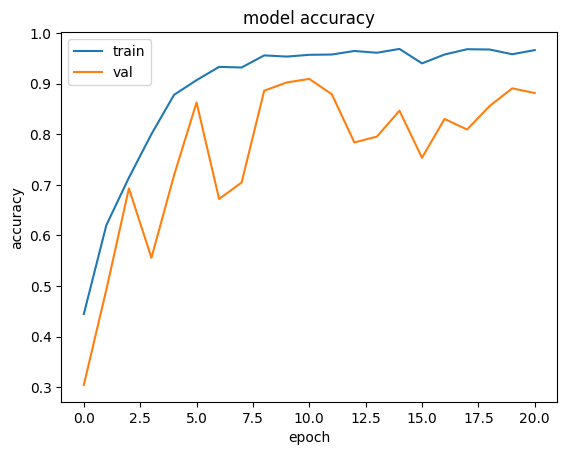

In [ ]:
# import keras
# from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

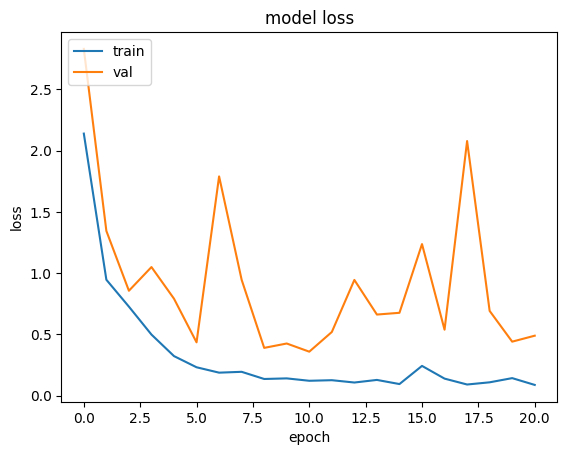

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model("model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = loaded_model.predict(X_test)

14/14 [==============================] - 4s 280ms/step


In [ ]:
# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_labels = label_dict.keys()

# Evaluate the performance (you can use any metric suitable for your task)
print(classification_report(actual_labels, predicted_labels, target_names=class_labels))

                             precision    recall  f1-score   support

       38s&ws_dot38_caliber       0.94      0.97      0.96       102
     remington_870_12_gauge       0.89      0.86      0.87        72
       glock_17_9mm_caliber       0.97      0.82      0.89       136
ruger_ar_556_dot223_caliber       0.84      0.98      0.91       120

                   accuracy                           0.91       430
                  macro avg       0.91      0.91      0.91       430
               weighted avg       0.92      0.91      0.91       430



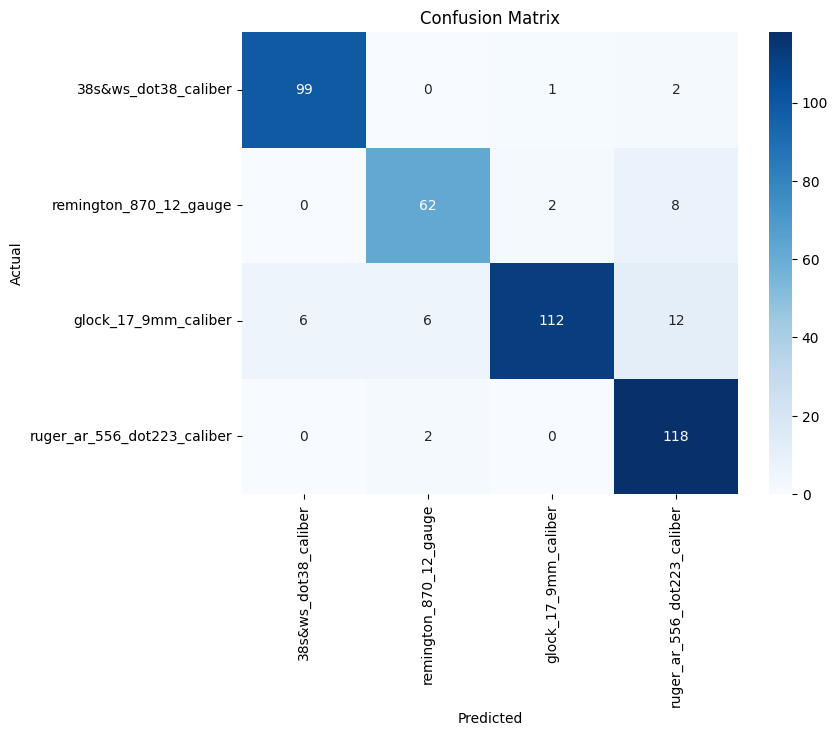

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# As compared to LSTM, CNN performs better in terms of finding results